## Observations and Insights 

In [25]:
print(f"Observations:")
print(f"Based on the final tumor size by drug regimen box and whisker plot, we can infer that Capomulin and Ramicane treatements work better than Infubinol and Ceftamin.")
print(f"The drug Capomulin is working to decrease tumor size.")
print(f"The weight of the mouse has a strong correlation to the average size of the tumor. The higher the weight, the larger the tumor.")

Observations:
Based on the final tumor size by drug regimen box and whisker plot, we can infer that Capomulin and Ramicane treatements work better than Infubinol and Ceftamin.
The drug Capomulin is working to decrease tumor size.
The weight of the mouse has a strong correlation to the average size of the tumor. The higher the weight, the larger the tumor.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
unique_id_count = df["Mouse ID"].unique()
s = pd.Series(unique_id_count)
s.count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

id_series = df["Mouse ID"].value_counts(ascending = False)
id_df = pd.DataFrame(id_series)
    
df.sort_values("Mouse ID", inplace = True)
df2 = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")
df3 = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")
# dropping ALL duplicte values 
drop_df = df2.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep = False, inplace = True) 


drop_df3 = df3.drop_duplicates(subset =["Mouse ID"], keep = False, inplace = True) 


In [5]:
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [8]:
# Checking the number of mice in the clean DataFrame.
df2_group = df2.groupby("Mouse ID")
id_group = df2_group["Mouse ID"].count()
len(id_group)

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = df2["Tumor Volume (mm3)"].mean()
median = df2["Tumor Volume (mm3)"].median()
std_dev = df2["Tumor Volume (mm3)"].std()
sem = df2["Tumor Volume (mm3)"].sem()
tumor_volume_list = df2["Tumor Volume (mm3)"].tolist()

Variation = [((e - mean) **2)  for e in tumor_volume_list]
v_series = pd.Series(Variation)
variance = v_series.mean()


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary = [
    {
        "Tumor Volume (mm3) Average": "{:.2f}".format(mean),
        "Tumor Volume (mm3) Median": "{:.2f}".format(median),
        "Tumor Volume (mm3) Standard Devidation":"{:.2f}".format(std_dev),
        "Tumor Volume (mm3) SEM": "{:.2f}".format(sem),
        "Tumor Volume (mm3) Variance": "{:.2f}".format(variance)
    }
]
summary_df = pd.DataFrame(summary)
summary_df


,Tumor Volume (mm3) Average,Tumor Volume (mm3) Median,Tumor Volume (mm3) Standard Devidation,Tumor Volume (mm3) SEM,Tumor Volume (mm3) Variance
0,50.45,48.95,8.91,0.21,79.43


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df2.groupby(["Drug Regimen"])


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64
['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']


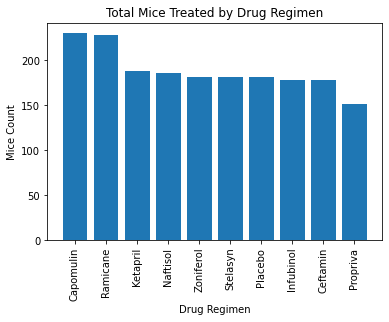

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot & DataFrame.plot().
y = df2["Drug Regimen"].value_counts()
x = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

print(y)
print(x)

plt.title("Total Mice Treated by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

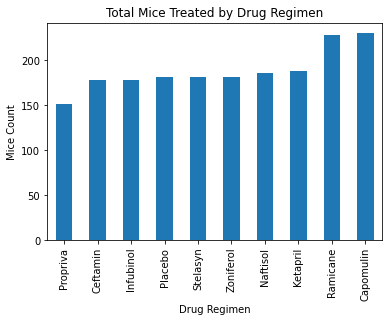

In [13]:
count =df2.groupby("Drug Regimen")["Drug Regimen"].count().sort_values()

count_chart = count.plot(kind="bar")
plt.title("Total Mice Treated by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count =df2.groupby("Sex")["Sex"].count().sort_values()
sex_count

Sex
Female    925
Male      958
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb3e5c5a110>,
 [Text(0.03027754049614056, 1.099583225836728, 'Female'),
  Text(-0.030277540496141186, -1.099583225836728, 'Male')],
 [Text(0.01651502208880394, 0.5997726686382152, '49.1%'),
  Text(-0.01651502208880428, -0.5997726686382152, '50.9%')])

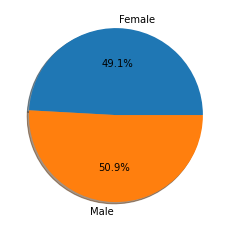

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [925,958]

#sex_count_dict = {
#    "Total": sex_count,
#}
#sex_count_df = pd.DataFrame(sex_count_dict)
#sex_count_df.index



#s_total = [sex_count_df[Female], sex_count_df[Male]]

explode = (0.1, 0,)
#plt.legend()

plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True)

# The colors of each section of the pie chart





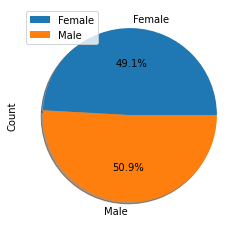

In [16]:
#sex_count_chart = sex_count.plot.pie()
#plt.title("Title")
#plt.show()


df_sex_count = pd.DataFrame({"Count": [925,958],
                   },
                  index=["Female", "Male"])

plot = df_sex_count.plot.pie(y="Count",labels=labels, autopct="%1.1f%%", shadow=True)
plt.legend(["Female", "Male"], loc ="upper left")

#plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [17]:
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
series = df2.groupby("Mouse ID")["Timepoint"].max()
series = series.reset_index()

#need both for the unique identifier of the rows, left bc merging to series
merged_data = series.merge(df2, on=["Mouse ID", "Timepoint"], how="left")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    #drug taking place of named drug in list 
    #inside loc method, conditional is saying column drug reg == drug name, if good filtering merged data with the row with the drug 
for drug in treatments_list:
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_volume)
    quantiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quantiles[.25]
    upperq = quantiles[.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug} potential outliers: {outliers}.")
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


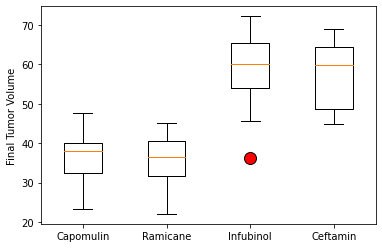

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#markerfacecolor is an attribute of the outlier 
out_dict = {"markerfacecolor":"red", "markersize":12}
plt.boxplot(tumor_vol_list, labels=treatments_list, flierprops= out_dict )
plt.ylabel("Final Tumor Volume")
plt.show()


## Line and Scatter Plots

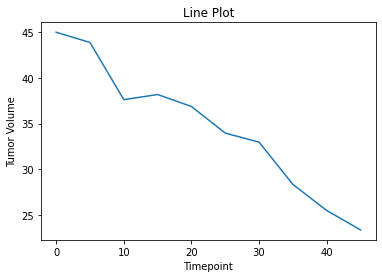

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = df2.loc[df2["Mouse ID"] == "s185"]
s185_df

plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Line Plot")
plt.show()

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


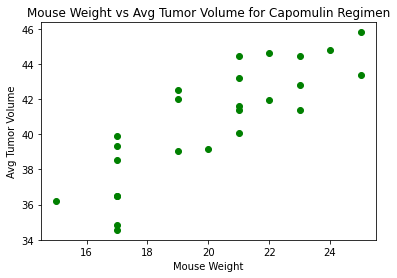

In [23]:
avg_t = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y = avg_t.values
y

X = cap_df.groupby("Mouse ID")["Weight (g)"].mean().to_list()
X = [[e] for e in X]
X

plt.scatter(X,y , color = "green")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

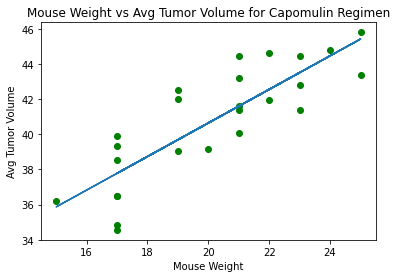

0.7088568047708719

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


model = LinearRegression()
model.fit(X,y)
model.coef_
model.intercept_
r_squared = model.score(X,y)
predictions = model.predict(X)

plt.scatter(X,y , color = "green")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin Regimen")
plt.plot(X,predictions)
plt.show()

r_squared
